In [1]:
import os
import shutil

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
files = 'gs://hm-eu-w4/jigsaw/*/*/params*.csv'
tf.io.gfile.glob(files)

['gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/params0.955880.csv',
 'gs://hm-eu-w4/jigsaw/t03/20200427_030518_t8b/params0.955538.csv',
 'gs://hm-eu-w4/jigsaw/t03/20200427_032625_t8e/params0.957579.csv',
 'gs://hm-eu-w4/jigsaw/t03/20200427_045931_t8b/params0.953195.csv',
 'gs://hm-eu-w4/jigsaw/t03/20200427_060738_t8b/params0.953819.csv',
 'gs://hm-eu-w4/jigsaw/t04/20200427_205505_t8e/params0.953652.csv',
 'gs://hm-eu-w4/jigsaw/t04/20200427_205530_t8b/params0.959791.csv',
 'gs://hm-eu-w4/jigsaw/t04/20200427_230403_t8e/params0.951874.csv',
 'gs://hm-eu-w4/jigsaw/t04/20200428_082634_t8b/params0.960881.csv',
 'gs://hm-eu-w4/jigsaw/test/20200428_111132_t8a/params0.513281.csv']

In [3]:
df = None

for f in sorted(tf.io.gfile.glob(files)):
    score = float(os.path.basename(f)[6:-4])
    if score > 0.95:
        if df is None:
            df = pd.read_csv(f)
        else:
            df = df.append(pd.read_csv(f), ignore_index=True)

df.describe()

,seed,stages,dropout,weight_decay,warm_up,pos_weight,lr,label_smoothing,gamma,epochs,callback,batch_size,auc,kwargs
count,9.000000,9.0,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.0,5.0,9.000000,0.0
mean,51.111111,20.0,0.181856,1.459554e-05,4.105783,2.914388,0.000046,0.027408,1.379028,30.777778,NaN,28.0,0.955801,NaN
std,35.229407,0.0,0.149937,2.811094e-05,2.383857,1.030604,0.000050,0.017181,0.857080,4.024232,NaN,0.0,0.003077,NaN
min,0.000000,20.0,0.000000,0.000000e+00,1.467823,1.294528,0.000008,0.003234,0.349519,26.000000,NaN,28.0,0.951874,NaN
25%,22.000000,20.0,0.000000,1.469134e-07,1.777561,2.143523,0.000010,0.010000,0.669243,29.000000,NaN,28.0,0.953652,NaN
50%,58.000000,20.0,0.251823,7.246458e-07,3.754905,2.980220,0.000031,0.031796,1.626891,31.000000,NaN,28.0,0.955538,NaN
75%,84.000000,20.0,0.300000,2.754154e-06,6.145949,3.862004,0.000056,0.040000,1.712352,33.000000,NaN,28.0,0.957579,NaN
max,93.000000,20.0,0.362907,7.742107e-05,6.926963,4.187396,0.000169,0.047034,2.748896,39.000000,NaN,28.0,0.960881,NaN


In [4]:
# df.groupby('loss').loss.count().to_frame('loss')
df.groupby('optimizer').optimizer.count().to_frame('optimizer')

,optimizer
optimizer,
AdamW,3
LAMB,6


In [7]:
df.sort_values(by='auc', ascending=False)

,tpu_id,seed,path,gcs,dataset,model_id,stages,dropout,weight_decay,warm_up,...,lr,loss_fn,label_smoothing,gamma,epochs,callback,batch_size,amp,auc,kwargs
8,t8b,14,jigsaw/t04,hm-eu-w4,../input/jigsaw-translated-distilled-ds4/jigsa...,NaN,20,0.300000,7.742107e-05,1.467823,...,0.000048,focal,0.043990,0.349519,31,NaN,NaN,NaN,0.960881,NaN
6,t8b,0,jigsaw/t04,hm-eu-w4,../input/jigsaw-translated-distilled-ds4/jigsa...,NaN,20,0.300000,7.246458e-07,1.777561,...,0.000056,bce,0.027509,1.703583,26,NaN,NaN,NaN,0.959791,NaN
2,t8e,75,jigsaw/t03,hm-eu-w4,../input/jigsaw-translated-distilled-ds3/jigsa...,jplu/tf-xlm-roberta-large,20,0.129303,3.713744e-07,6.086450,...,0.000169,focal,0.038399,1.626891,39,NaN,28.0,False,0.957579,NaN
0,t8e,29,jigsaw/t03,hm-eu-w4,../input/jigsaw-translated-distilled-ds3/jigsa...,jplu/tf-xlm-roberta-large,20,0.251823,2.754154e-06,6.862824,...,0.000031,focal,0.047034,2.748896,31,NaN,28.0,False,0.955880,NaN
1,t8b,58,jigsaw/t03,hm-eu-w4,../input/jigsaw-translated-distilled-ds3/jigsa...,jplu/tf-xlm-roberta-large,20,0.000000,1.469134e-07,3.754905,...,0.000010,bce,0.003234,0.669243,33,NaN,28.0,False,0.955538,NaN
4,t8b,85,jigsaw/t03,hm-eu-w4,../input/jigsaw-translated-distilled-ds3/jigsa...,jplu/tf-xlm-roberta-large,20,0.000000,2.725716e-06,1.694357,...,0.000022,focal,0.031796,0.391764,26,NaN,28.0,False,0.953819,NaN
5,t8e,22,jigsaw/t04,hm-eu-w4,../input/jigsaw-translated-distilled-ds4/jigsa...,NaN,20,0.362907,0.000000e+00,6.145949,...,0.000010,focal,0.010000,1.712352,33,NaN,NaN,NaN,0.953652,NaN
3,t8b,84,jigsaw/t03,hm-eu-w4,../input/jigsaw-translated-distilled-ds3/jigsa...,jplu/tf-xlm-roberta-large,20,0.000000,4.721595e-05,2.235218,...,0.000056,bce,0.004705,0.868902,29,NaN,28.0,False,0.953195,NaN
7,t8e,93,jigsaw/t04,hm-eu-w4,../input/jigsaw-translated-distilled-ds4/jigsa...,NaN,20,0.292672,0.000000e+00,6.926963,...,0.000008,focal,0.040000,2.340103,29,NaN,NaN,NaN,0.951874,NaN


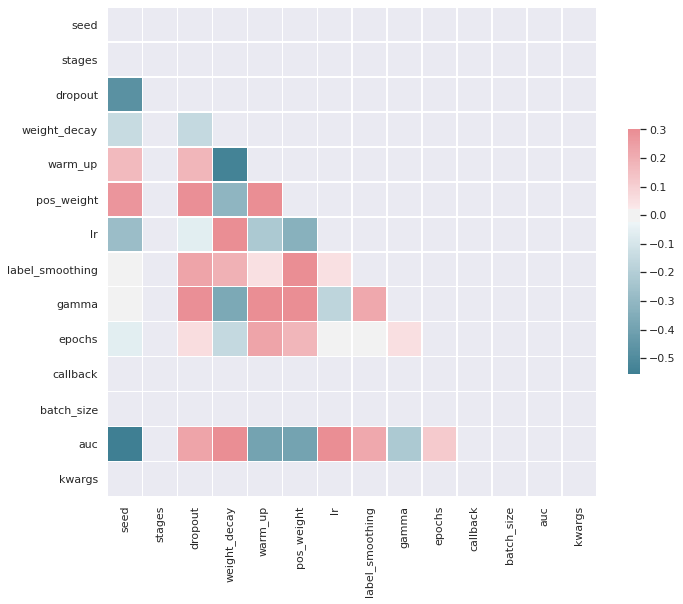

In [6]:
# Compute the correlation matrix
corr = df.corr('kendall')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
preds, oof, scores = [], [], []

for f in sorted(tf.io.gfile.glob(files)):
    score = float(os.path.basename(f)[6:-4])
    if score < 0.95:
        continue
    folder = os.path.dirname(f)
    sub = os.path.join(folder, 'submission.csv')
    print(score, sub)
    sub = pd.read_csv(sub)
    sub.to_csv(f'submission_{"_".join(folder.split("/")[-3:])}_{score}.csv', index=False)
    preds.append(sub.toxic.values)

    valid = pd.read_csv(os.path.join(folder, 'valid_oof.csv'))
    oof.append(valid.pred.values)
    scores.append(score)
    
!ls -sh *.csv

0.95588 gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/submission.csv
0.955538 gs://hm-eu-w4/jigsaw/t03/20200427_030518_t8b/submission.csv
0.957579 gs://hm-eu-w4/jigsaw/t03/20200427_032625_t8e/submission.csv
0.953195 gs://hm-eu-w4/jigsaw/t03/20200427_045931_t8b/submission.csv
0.953819 gs://hm-eu-w4/jigsaw/t03/20200427_060738_t8b/submission.csv
1.6M submission_decorr13.csv
1.6M submission_decorr7.csv
1.1M submission_jigsaw_t03_20200427_011557_t8e_0.95588.csv
1.2M submission_jigsaw_t03_20200427_030518_t8b_0.955538.csv
1.1M submission_jigsaw_t03_20200427_032625_t8e_0.957579.csv
1.2M submission_jigsaw_t03_20200427_045931_t8b_0.953195.csv
1.1M submission_jigsaw_t03_20200427_060738_t8b_0.953819.csv
1.1M submission_jigsaw_t03_20200427_075752_t8b_0.951288.csv
1.2M submission_jigsaw_t03_20200427_094117_t8b_0.952096.csv
1.1M submission_mk000__20200422_181302_t8d_0.955835.csv
1.1M submission_r000__20200421_194623_t8a_0.957642.csv
1.1M submission_r000__20200422_141934_t8a_0.958962.csv
1.1M submissio

[0.14264676 0.22799796 0.18699156 0.23407157 0.20829215]


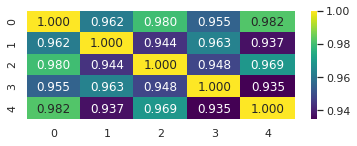

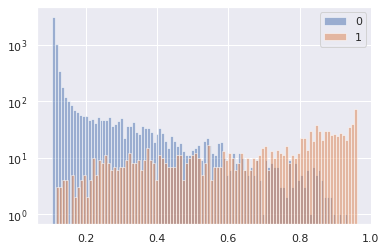

AUC: 0.9566757934935332 toxic: 0.15375 pred: 0.2605445545226689 ratio: 0.161625


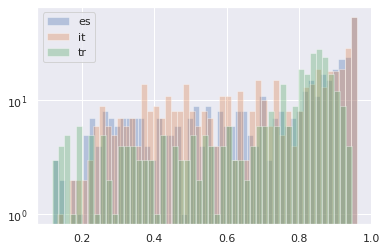

In [6]:
corr_mat = np.corrcoef(preds)

weights = (1-corr_mat).sum(axis=0) # gain
weights /= weights.sum()
print(weights)

fig, ax = plt.subplots(figsize=(len(preds)+1, len(preds)//2))
ax = sns.heatmap(corr_mat, cmap='viridis', annot=True, fmt="0.03f", ax=ax)
plt.show()

sub['toxic'] = np.average(preds, weights=weights, axis=0)
sub.to_csv(f'submission_decorr{len(preds)}.csv', index=False)
valid['pred'] = np.average(oof, weights=weights, axis=0)
valid.to_csv(f'valid_decorr{len(preds)}.csv', index=False)

ax = valid.groupby('toxic').pred.hist(bins=100, log=True, alpha=0.5)
plt.legend([0, 1])
plt.show()

ax = valid[valid.toxic == 1].groupby('lang').pred.hist(bins=50, log=True, alpha=0.34)
plt.legend(valid.lang.unique())

valid_auc = roc_auc_score(valid.toxic, valid.pred)
print('AUC:', valid_auc,
      'toxic:', valid.toxic.mean(),
      'pred:', valid.pred.mean(),
      'ratio:', (valid.pred > 0.5).mean())

[0.20282476 0.20126464 0.21094808 0.19118958 0.19377294]


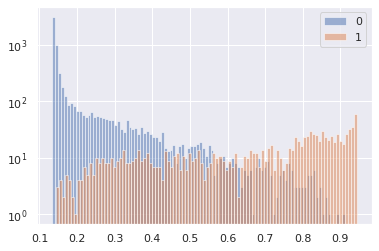

AUC: 0.9571296129504869 toxic: 0.15375 pred: 0.2730331953409946 ratio: 0.153125


('mean score:', 0.9552021999999999)

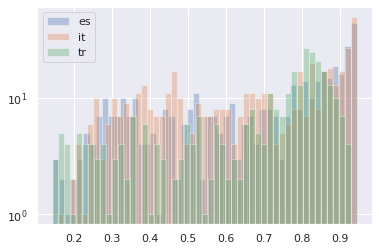

In [7]:
# weight by score
weights = 1 / (1-np.array(scores))
weights /= weights.sum()
print(weights)

sub['toxic'] = np.average(preds, weights=weights, axis=0)
sub.to_csv(f'submission_score_blend{len(preds)}.csv', index=False)
valid['pred'] = np.average(oof, weights=weights, axis=0)
# valid.to_csv(f'valid_score_blend{len(preds)}.csv', index=False)

ax = valid.groupby('toxic').pred.hist(bins=100, log=True, alpha=0.5)
plt.legend([0, 1])
plt.show()

ax = valid[valid.toxic == 1].groupby('lang').pred.hist(bins=50, log=True, alpha=0.34)
plt.legend(valid.lang.unique())

valid_auc = roc_auc_score(valid.toxic, valid.pred)
print('AUC:', valid_auc,
      'toxic:', valid.toxic.mean(),
      'pred:', valid.pred.mean(),
      'ratio:', (valid.pred > 0.5).mean())

'mean score:', np.mean(scores)

[0.2 0.2 0.2 0.2 0.2]


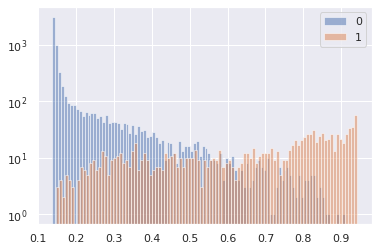

AUC: 0.9571418621128603 toxic: 0.15375 pred: 0.27327150578046394 ratio: 0.1505


('mean score:', 0.9552021999999999)

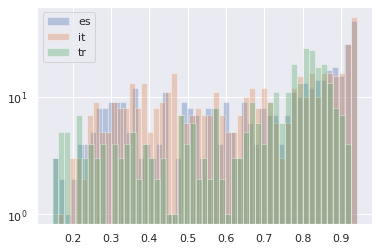

In [8]:
# average
weights = np.ones_like(scores)
weights /= weights.sum()
print(weights)

sub['toxic'] = np.average(preds, weights=weights, axis=0)
sub.to_csv(f'submission_avg{len(preds)}.csv', index=False)
valid['pred'] = np.average(oof, weights=weights, axis=0)
# valid.to_csv(f'valid_score_blend{len(preds)}.csv', index=False)

ax = valid.groupby('toxic').pred.hist(bins=100, log=True, alpha=0.5)
plt.legend([0, 1])
plt.show()

ax = valid[valid.toxic == 1].groupby('lang').pred.hist(bins=50, log=True, alpha=0.34)
plt.legend(valid.lang.unique())

valid_auc = roc_auc_score(valid.toxic, valid.pred)
print('AUC:', valid_auc,
      'toxic:', valid.toxic.mean(),
      'pred:', valid.pred.mean(),
      'ratio:', (valid.pred > 0.5).mean())

'mean score:', np.mean(scores)

In [9]:
# clean up
folders = 'gs://hm-eu-w4/jigsaw/*/*/*'
for f in tf.io.gfile.glob(folders):
    n_items = len(tf.io.gfile.glob(os.path.join(f, 'best_model.tf*')))
    print(f, n_items, len(tf.io.gfile.glob(os.path.join(f, '*'))))
    if n_items > 0:
        params = tf.io.gfile.glob(os.path.join(f, 'params*.csv'))
        if len(params) == 0:
            print(f, n_items, tf.io.gfile.glob(os.path.join(f, '*')))
            !gsutil -m rm -r {f}
        else:
            score = float(os.path.basename(params[0])[6:-4])
            if score < 0.95:
                !gsutil rm -r {f}
#     elif n_items == 0:
#         !gsutil rm -r {f}

gs://hm-eu-w4/jigsaw/t02/20200426_161827_t8e/ 0 0
gs://hm-eu-w4/jigsaw/t02/20200426_172014_t8b/ 0 0
gs://hm-eu-w4/jigsaw/t02/20200426_181251_t8e/ 0 1
gs://hm-eu-w4/jigsaw/t02/20200426_181251_t8e/sub_hist.png 0 0
gs://hm-eu-w4/jigsaw/t02/20200426_185232_t8b/ 0 0
gs://hm-eu-w4/jigsaw/t03/20200427_011555_t8b/ 0 1
gs://hm-eu-w4/jigsaw/t03/20200427_011555_t8b/valid_toxic_hist.png 0 0
gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/ 3 11
gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/best_model.tf.data-00000-of-00002 0 0
gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/best_model.tf.data-00001-of-00002 0 0
gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/best_model.tf.index 0 0
gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/checkpoint 0 0
gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/history.png 0 0
gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/params0.955880.csv 0 0
gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/sub_hist.png 0 0
gs://hm-eu-w4/jigsaw/t03/20200427_011557_t8e/submission.csv 0 0
gs://hm-eu-w4/jig

Removing gs://hm-eu-w4/jigsaw/t04/20200427_160144_t8b/best_model.tf_temp_23f838ae63e04dc79473b3c73dcd1ef1/part-00000-of-00002.index#1588003931075891...
Removing gs://hm-eu-w4/jigsaw/t04/20200427_160144_t8b/best_model.tf_temp_23f838ae63e04dc79473b3c73dcd1ef1/part-00000-of-00002.data-00000-of-00001#1588003930691478...
Removing gs://hm-eu-w4/jigsaw/t04/20200427_160144_t8b/checkpoint#1588003929807695...
/ [5/5 objects] 100% Done                                                       
Operation completed over 5 objects.                                              
gs://hm-eu-w4/jigsaw/t04/20200427_160144_t8b/best_model.tf_temp_23f838ae63e04dc79473b3c73dcd1ef1 0 0
gs://hm-eu-w4/jigsaw/t04/20200427_160144_t8b/checkpoint 0 0
gs://hm-eu-w4/jigsaw/test/20200427_154951_t8a/ 1 2
gs://hm-eu-w4/jigsaw/test/20200427_154951_t8a/ 1 ['gs://hm-eu-w4/jigsaw/test/20200427_154951_t8a/best_model.tf_temp_e2aedfa2e4884fb58aa7490b49535d31', 'gs://hm-eu-w4/jigsaw/test/20200427_154951_t8a/checkpoint']
/snap/googl

In [10]:
# import pdb; pdb.pm()